In [183]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("../")

from unique_hypercube_size import create_random_P, create_B
from utils import create_block_A
%load_ext autoreload
%autoreload 2


m = 6
k = 2
S = np.sqrt(2)**np.arange(m)



P = create_random_P(m,k)
B = create_B(m,S)


print P.shape



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TypeError: create_random_P() takes exactly 3 arguments (2 given)

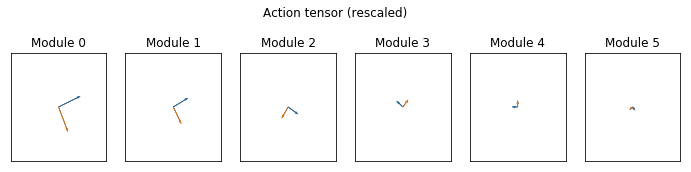

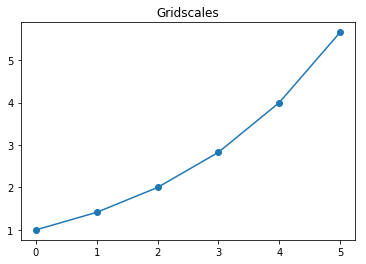

In [184]:
fig, ax = plt.subplots(1, m, figsize=(2*m, 2));
plt.suptitle("Action tensor (rescaled)", y=1.2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)

for i in range(m):
    ax[i].set_title("Module {}".format(i))
    ax[i].set_xlim(-2,2)
    ax[i].set_ylim(-2,2)
    ax[i].set_xticks([])
    ax[i].set_yticks([])

    r1 = P[i,0,:]
    r2 = P[i,1,:] 

    ax[i].quiver(0.0,0.0,r1[:2],r2[:2], angles='xy', scale_units='xy', scale=1)
    for l in range(0,k):
        ax[i].quiver(0.0,0.0,r1[l],r2[l], angles='xy', scale_units='xy', scale=1, color="C{}".format(l))


plt.show()


fig, ax = plt.subplots(1, 1);
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.4, hspace=None)

ax.set_title("Gridscales")
ax.plot(range(m), S, marker="o")

plt.show()

(6, 2, 3)
(6, 2, 100000)


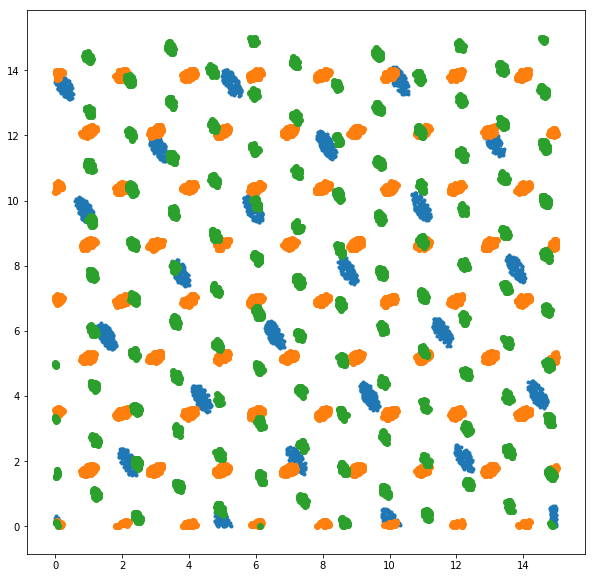

In [266]:

m = 6
k = 3
S = np.sqrt(2)**np.arange(m)



P = create_random_P(m,k,S)
B = create_B(m, np.pi/3.)

print P.shape

T = 100000
X = np.random.sample((T,3))*15.
X_ = P[1,[0]]*X[:,[0]] + P[1,[1]]*X[:,[1]]
A = np.zeros((m,2,k))
for i in range(m):
    A[i] = np.dot(np.linalg.inv(B[i]), P[i])


Phi = np.zeros((m,2,T))
for i in range(m):
    Phi[i] = np.dot(A[i], X_.T)

Phi = (Phi)%1.
print Phi.shape

D = np.linalg.norm( np.minimum(Phi, 1. - Phi), axis=1)


# plt.plot(D)
C = -D

plt.figure(figsize=(10,10))

subset = np.where(D[2]<0.1)[0]
plt.scatter(X[subset,0], X[subset,1],  cmap="jet", vmin=-.5, vmax=0.,  marker=".")


subset = np.where(D[1]<0.1)[0]
plt.scatter(X[subset,0], X[subset,1],  vmin=-.5, vmax=0.)

subset = np.where(D[0]<0.1)[0]
plt.scatter(X[subset,0], X[subset,1],  vmin=-.5, vmax=0.)

